In [3]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import scipy.optimize as fitter
%matplotlib inline

from matplotlib.widgets import Slider, Button, RadioButtons


In [4]:
#import data from JHU github
corona_master = Table.read_table('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
corona_master.show()

Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20
nan,Afghanistan,33,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142
nan,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341
nan,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484
nan,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852
nan,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113
nan,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,3,3,3,7,7,7,7,7,7,7,9,15,15,15,15,19,19,19,19,21,21,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,26,26,26,26,26,26
nan,Argentina,-38.4161,-63.6

In [5]:
corona_master = corona_master.drop("Province/State").drop("Lat").drop("Long")

In [6]:
corona_master = corona_master.group("Country/Region", np.sum)
corona_master.show()

Country/Region,1/22/20 sum,1/23/20 sum,1/24/20 sum,1/25/20 sum,1/26/20 sum,1/27/20 sum,1/28/20 sum,1/29/20 sum,1/30/20 sum,1/31/20 sum,2/1/20 sum,2/2/20 sum,2/3/20 sum,2/4/20 sum,2/5/20 sum,2/6/20 sum,2/7/20 sum,2/8/20 sum,2/9/20 sum,2/10/20 sum,2/11/20 sum,2/12/20 sum,2/13/20 sum,2/14/20 sum,2/15/20 sum,2/16/20 sum,2/17/20 sum,2/18/20 sum,2/19/20 sum,2/20/20 sum,2/21/20 sum,2/22/20 sum,2/23/20 sum,2/24/20 sum,2/25/20 sum,2/26/20 sum,2/27/20 sum,2/28/20 sum,2/29/20 sum,3/1/20 sum,3/2/20 sum,3/3/20 sum,3/4/20 sum,3/5/20 sum,3/6/20 sum,3/7/20 sum,3/8/20 sum,3/9/20 sum,3/10/20 sum,3/11/20 sum,3/12/20 sum,3/13/20 sum,3/14/20 sum,3/15/20 sum,3/16/20 sum,3/17/20 sum,3/18/20 sum,3/19/20 sum,3/20/20 sum,3/21/20 sum,3/22/20 sum,3/23/20 sum,3/24/20 sum,3/25/20 sum,3/26/20 sum,3/27/20 sum,3/28/20 sum,3/29/20 sum,3/30/20 sum,3/31/20 sum,4/1/20 sum,4/2/20 sum,4/3/20 sum,4/4/20 sum,4/5/20 sum,4/6/20 sum,4/7/20 sum,4/8/20 sum,4/9/20 sum,4/10/20 sum,4/11/20 sum,4/12/20 sum,4/13/20 sum,4/14/20 sum,4/15/20 sum,4/16/20 sum,4/17/20 sum,4/18/20 sum,4/19/20 sum,4/20/20 sum,4/21/20 sum,4/22/20 sum,4/23/20 sum,4/24/20 sum,4/25/20 sum,4/26/20 sum,4/27/20 sum,4/28/20 sum,4/29/20 sum,4/30/20 sum,5/1/20 sum,5/2/20 sum,5/3/20 sum,5/4/20 sum,5/5/20 sum,5/6/20 sum,5/7/20 sum,5/8/20 sum,5/9/20 sum,5/10/20 sum,5/11/20 sum,5/12/20 sum,5/13/20 sum,5/14/20 sum,5/15/20 sum,5/16/20 sum,5/17/20 sum,5/18/20 sum,5/19/20 sum,5/20/20 sum,5/21/20 sum,5/22/20 sum,5/23/20 sum,5/24/20 sum,5/25/20 sum,5/26/20 sum,5/27/20 sum,5/28/20 sum,5/29/20 sum,5/30/20 sum,5/31/20 sum,6/1/20 sum,6/2/20 sum,6/3/20 sum,6/4/20 sum,6/5/20 sum,6/6/20 sum,6/7/20 sum,6/8/20 sum,6/9/20 sum,6/10/20 sum
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,

In [7]:

def country_total_cases_array(country):
    
    temp_tbl = corona_master.where("Country/Region", are.equal_to(country))
    country_arr = np.empty([0]) #cases start at 0
    
    for i in range(1, total_days+1):
        country_arr = np.append(country_arr, temp_tbl.column(i))
    
    return country_arr


In [8]:
def country_new_cases_array(country):
    
    temp_tbl = corona_master.where("Country/Region", are.equal_to(country)).take(0)
    country_arr = np.array([0]) #so when calculating difference, arrays are the same size
    
    for i in range(1, total_days+1):
        country_arr = np.append(country_arr, temp_tbl.column(i))
    
    country_arr = np.diff(country_arr)
    
    return country_arr

test = np.array([2, 2, 2, 4, 5])
test = np.delete(test, 3)
str(5) + str(6)

'56'

In [9]:

def country_new_cases_avg_array(country, avg_days):
    
    temp_tbl = corona_master.where("Country/Region", are.equal_to(country)).take(0)
    country_arr = country_new_cases_array(country)
    
    country_arr_avg = country_new_cases_array(country)

    #gives country_arr_avg all average new case values except first few. First few aren't used as average (only China)
    for i in range(avg_days-1, len(country_arr)):
        
        country_arr_avg[i] = 0.0
        
        for k in range(0, avg_days):
            
            country_arr_avg[i] = country_arr_avg[i] + (country_arr[i-k])
            #print(country_arr[i-k])
        
        country_arr_avg[i] = float(country_arr_avg[i])/avg_days
    
    return country_arr_avg


In [10]:

def plot_graph(countries, min_cases, scale):
    
    plt.figure(0)
    for country in countries:
            total_cases = country_total_cases_array(country)
            total_cases = total_cases[total_cases >= min_cases]
            
            new_cases = country_new_cases_array(country)
            new_cases = new_cases[len(new_cases)-len(total_cases) :] #get new cases that corrospond to total cases
            
            plt.plot(total_cases, new_cases)
            plt.xlabel("Total Cases")
            plt.ylabel("New Cases")
            plt.legend((country))
            plt.yscale(scale)
            plt.xscale(scale)

    plt.legend((countries))
    plt.title("New cases per day VS Total cases (Lineplot)")

    
    
def scatter_graph(countries, min_cases, scale):
    
    plt.figure(1)
    for country in countries:
            total_cases = country_total_cases_array(country)
            total_cases = total_cases[total_cases >= min_cases]
            
            new_cases = country_new_cases_array(country)
            new_cases = new_cases[len(new_cases)-len(total_cases) :] #get new cases that corrospond to total cases
            
            plt.scatter(total_cases, new_cases)
            plt.xlabel("Total Cases")
            plt.ylabel("New Cases")
            plt.legend((country))
            plt.yscale(scale)
            plt.xscale(scale)

    plt.legend((countries))
    plt.title("New cases per day VS Total cases (Scatterplot)")


In [11]:
def plot_time(countries, min_cases, avg_days, scale):
    
    plt.figure(4)
    for country in countries:
            total_cases = country_total_cases_array(country)
            total_cases = total_cases[total_cases >= min_cases]
            
            time = np.arange(0, len(total_cases))
            
            plt.scatter(time, total_cases)
            plt.xlabel("Time (Days)")
            plt.ylabel("Total Cases")
            plt.legend((country))
            plt.yscale(scale)
    
    plt.legend((countries))
    plt.title("Total Cases VS Time (Scatterplot)")
    
    
    plt.figure(5)
    
    for country in countries:
        
            new_cases = country_new_cases_avg_array(country, avg_days)
            
            time = np.arange(0, len(new_cases))
            
            plt.scatter(time, new_cases)
            plt.xlabel("Time (Days)")
            plt.ylabel("New Cases")
            plt.legend((country))
            plt.yscale(scale)

    plt.legend((countries))
    avg_days_str = "Average New cases over last " + str(avg_days) + " days VS Time (Scatterplot)"
    plt.title(avg_days_str)

In [12]:
def plot_graph_avg(countries, min_cases, avg_days, scale):
    
    plt.figure(2)
    for country in countries:
            
            total_cases = country_total_cases_array(country)
            if country == "China":
                total_cases = np.delete(total_cases, 0)
            total_cases = total_cases[total_cases >= min_cases]
            
            new_cases = country_new_cases_avg_array(country, avg_days)
            new_cases = new_cases[len(new_cases)-len(total_cases) :] #get new cases that corrospond to total cases
            
            plt.plot(total_cases, new_cases)
            plt.xlabel("Total Cases")
            plt.ylabel("New Cases")
            plt.legend((country))
            plt.yscale(scale)
            plt.xscale(scale)

    plt.legend((countries))
    avg_days_str = "Average New cases over last " + str(avg_days) + " days VS Total cases (Lineplot)"
    plt.title(avg_days_str)
    

    
def scatter_graph_avg(countries, min_cases, avg_days, scale):
    
    plt.figure(3)
    for country in countries:
            
            total_cases = country_total_cases_array(country)
            if country == "China":
                total_cases = np.delete(total_cases, 0)
            total_cases = total_cases[total_cases >= min_cases]
            
            new_cases = country_new_cases_avg_array(country, avg_days)
            new_cases = new_cases[len(new_cases)-len(total_cases) :] #get new cases that corrospond to total cases
            
            plt.scatter(total_cases, new_cases)
            plt.xlabel("Total Cases")
            plt.ylabel("New Cases")
            plt.legend((country))
            plt.yscale(scale)
            plt.xscale(scale)

    plt.legend((countries))
    avg_days_str = "Average New cases over last " + str(avg_days) + " days VS Total cases (Scatterplot)"
    plt.title(avg_days_str)


Data is collected since 01/22/2020


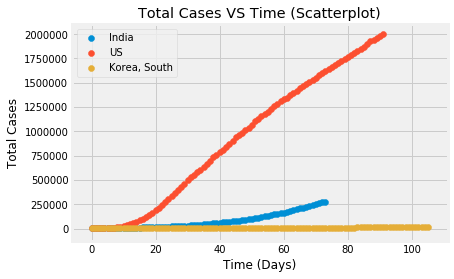

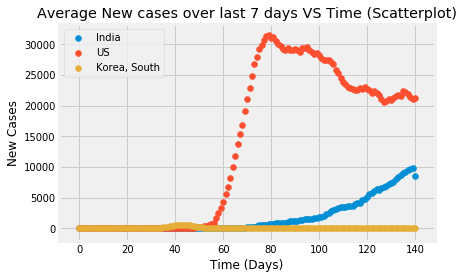

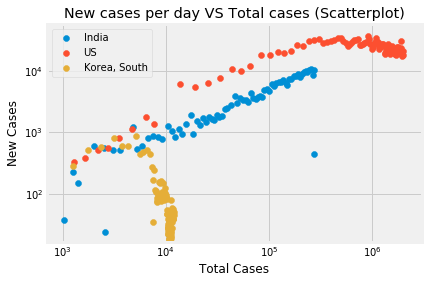

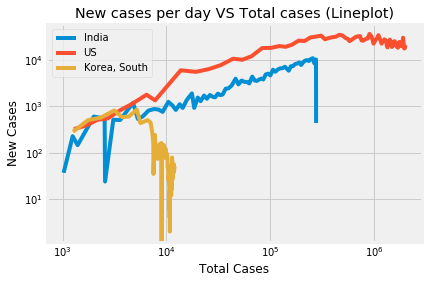

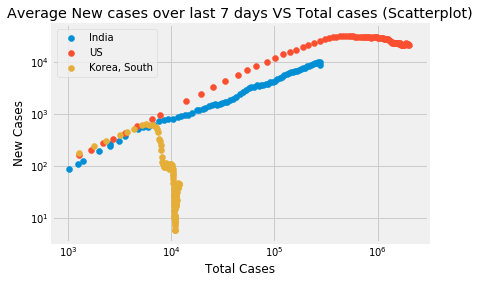

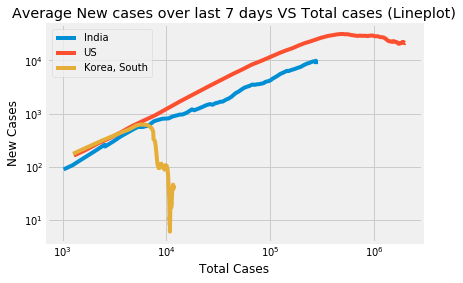

In [16]:
total_days = corona_master.num_columns - 1
num_countries = corona_master.num_columns
countries_array = corona_master.column("Country/Region")


min_cases = 1000
avg_days = 7
countries_to_plot = np.array(["India", "US", "Korea, South"])
scale = "log" #log or linear
scale_time = "linear" #log or linear


plot_time(countries_to_plot, min_cases, avg_days, scale_time)


scatter_graph(countries_to_plot, min_cases, scale) #scatterplot of corona data

plot_graph(countries_to_plot, min_cases, scale) #lineplot of corona data

scatter_graph_avg(countries_to_plot, min_cases, avg_days, scale) #scatterplot of corona data averages

plot_graph_avg(countries_to_plot, min_cases, avg_days, scale) #lineplot of corona data averages


print("Data is collected since 01/22/2020")

In [14]:
def predict_country(country, min_cases, avg_days, population, time_prediction, scale, percent_complete):
    
    total_cases = country_total_cases_array(country)
    total_cases = total_cases[total_cases >= min_cases]
    
    #Not used, but there in case
    new_cases = country_new_cases_array(country)
    new_cases = new_cases[len(new_cases)-len(total_cases) :]

    new_cases_avg = country_new_cases_avg_array(country, avg_days)
    new_cases_avg = new_cases_avg[len(new_cases_avg)-len(total_cases) :] #new cases that corrospong to after min cases occured

    #Used
    time_arr = np.arange(0, len(total_cases), 1)
    time_predict_arr = np.arange(0, time_prediction, 1)


    dt = 1
    N = population

    S_0 = 1
    I_0 = 1.35*total_cases[0]/N
    R_0 = 0 #assuming no one's recovered until after first 100 cases (trivial assumption whose effects are negligible)
    
    def graph_predictions(time, r_tr, r_re, graph_type):
        '''Define your model function according to the
       SIR model given above. r_tr and r_re are the parameters to figure out'''
    
        S = np.zeros([len(time)])
        I = np.zeros([len(time)])
        R = np.zeros([len(time)])

        I[0] = I_0
        S[0] = S_0
        R[0] = R_0
        
        for i in range(1, len(time)):
            S[i] = S[i - 1] - (r_tr*S[i - 1]*I[i - 1])
            I[i] = I[i - 1] + (r_tr*S[i - 1]*I[i - 1] - r_re*I[i - 1])
            R[i] = R[i - 1] + (r_re*I[i - 1])
        
        S = S*N
        I = I*N
        R = R*N
        
        if graph_type == "I":
            return I
        elif graph_type == "S":
            return S
        elif graph_type == "R":
            return R
        elif graph_type == "T":
            return I + R
    
    def model_T(time, r_tr, r_re):
        '''Define your model function according to the
           SIR model given above. r_tr and r_re are the parameters to figure out'''
    
        S = np.zeros([len(time)])
        I = np.zeros([len(time)])
        R = np.zeros([len(time)])

        I[0] = I_0
        S[0] = S_0
        R[0] = R_0
        
        for i in range(1, len(time)):
            S[i] = S[i - 1] - (r_tr*S[i - 1]*I[i - 1])
            I[i] = I[i - 1] + (r_tr*S[i - 1]*I[i - 1] - r_re*I[i - 1])
            R[i] = R[i - 1] + (r_re*I[i - 1])
        
        return (I + R)*N

    
    
    # Use scipy.optimize.curve_fit() to fit the generated data and print the results
    
    #total_cases_errors = total_cases*0.25
    #par_approx = [3, 4]
    par, cov = fitter.curve_fit(model_T, time_arr, total_cases)#, par_approx, total_cases_errors, absolute_sigma=True)

    r_tr = par[0]
    r_re = par[1]
    
    error_r_tr = np.sqrt(cov[0,0])
    error_r_re = np.sqrt(cov[1,1])
    error_ratio = ((error_r_tr/r_tr) + (error_r_re/r_re))*(r_tr/r_re)

    #print ('Rate of transmission = {0:6.10f} +/- {1:5.10f}'.format(r_tr, error_r_tr))
    #print ('Rate of recovery = {0:6.10f} +/- {1:5.10f}'.format(r_re, error_r_re))
    print ('Calculated R0 Ratio (R_tr/R_re) = {0:6.4f} +/- {1:5.4f}'.format(r_tr/r_re, error_ratio))
    print("")



    # Plot fitted function over the data points
    plt.figure(0)
    fig = plt.bar(time_arr, total_cases, color='#49FA77', label = "Data")
    fig = plt.plot(time_predict_arr, model_T(time_predict_arr, r_tr, r_re), label = "Prediction")
    plt.yscale(scale)
    plt.legend(loc="upper left")
    
    title_str = "Total Cases VS Time since " + str(min_cases) + " cases"
    x_str = "Time since " + str(min_cases) + " cases (days)"
    
    plt.title(title_str)
    plt.xlabel(x_str)
    plt.ylabel("Total Cases")
    
    plt.figure(1)
    #fig = plt.plot(time_predict_arr, graph_predictions(time_predict_arr, r_tr, r_re, "S"), color="b", label = "Uninfected")
    fig = plt.plot(time_predict_arr, graph_predictions(time_predict_arr, r_tr, r_re, "I"), color="r", label = "Infected")
    fig = plt.plot(time_predict_arr, graph_predictions(time_predict_arr, r_tr, r_re, "R"), color="g", label = "Recovered")
    plt.yscale(scale)
    plt.legend(loc="upper left")
    
    title_str = "Predictions VS Time since " + str(min_cases) + " cases"
    
    plt.title(title_str)
    plt.xlabel(x_str)
    plt.ylabel("Cases")
    
    #Calculate time for it to be over
    temp = graph_predictions(range(0, 500), r_tr, r_re, "T")
    max_cases = temp[len(temp) - 1]
    wanted_cases_complete = (percent_complete/100)*max_cases
    temp2 = temp[temp <= wanted_cases_complete]
    time_after_min = len(temp2)
    time_after_today = time_after_min - len(total_cases)
    
    print("Total cases in ", country, " predicted to be about ", round(max_cases))
    print("")
    print(percent_complete, "% of the cases are predicted to be over in about '", time_after_today, "' days")

    


Calculated R0 Ratio (R_tr/R_re) = 1.0035 +/- 0.0389

Total cases in  US  predicted to be about  2715139.0

90 % of the cases are predicted to be over in about ' 31 ' days


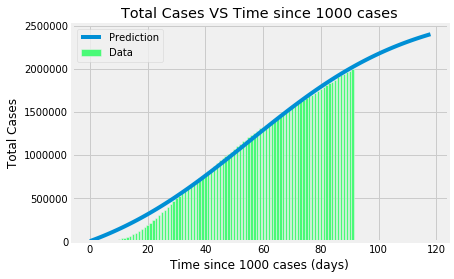

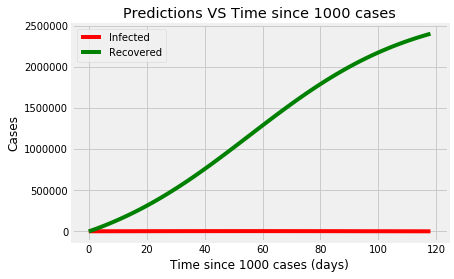

In [24]:
country = "US"
min_cases = 1000
avg_days = 7
scale = "linear"

percent_complete = 90
time_prediction = 80+39
population = 327000000


predict_country(country, min_cases, avg_days, population, time_prediction, scale, percent_complete)